# Risky Business

Harold has been boasting about his recent cryptocurrency returns. He's even bet you five bucks that his trading algorithm has made his returns better than yours. Calculate the standard deviation and sharpe ratio for each your portfolios to determine which portfolio is the better investment based off of the greatest risk to reward ratio.

In [17]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read in data

In [19]:
harold_portfolio_path = Path("../../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../../Resources/my_portfolio.csv")
risk_free_path = Path("../../../16-Ins_Sharpe_Ratios/Resources/risk_free_rate.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)
risk_free_returns = pd.read_csv(risk_free_path, parse_dates=True, infer_datetime_format=True)

# Drop na
harold_portfolio = harold_portfolio.dropna()
my_portfolio = my_portfolio.dropna()
risk_free_returns = risk_free_returns.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')
risk_free_returns = risk_free_returns.set_index('Date')

harold_portfolio.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


### Calculate daily returns 

In [20]:
# compute daily returns
harold_returns = harold_portfolio.pct_change()
my_returns = my_portfolio.pct_change()

harold_returns
# test = risk_free_returns.loc["2019-05-01":"2019-06-01"] #query("Date >= '2019-05-01' and Date < '2019-06-01'")
# test

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224


### `Concat` portfolios into one DataFrame

In [21]:
combined_returns = pd.concat([harold_returns,my_returns,risk_free_returns],axis="columns",join="outer")
combined_returns

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM,rf_rate
Date,,,,,,,,,,,,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000260
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823,NaN
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423,NaN
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627,0.000260
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709,0.000261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000010
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000009
2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000010


### Calculate `std dev` for all data

In [22]:
combined_std = combined_returns.std().sort_values(ascending=False)
combined_std

ETH        0.091517
LTC        0.084703
XLM        0.084177
XRP        0.080277
XRP        0.077449
BTC        0.070488
DOGE       0.070467
XLM        0.065825
TRON       0.064923
ZIL        0.064726
LTC        0.062719
ETH        0.059042
SOLVE      0.059016
DOGE       0.050907
BTC        0.042377
BTT        0.030731
rf_rate    0.000345
dtype: float64

### Calculate `sharpe ratio` for all data

In [23]:
combined_sharpe_ratios = ((combined_returns.mean()-combined_returns['rf_rate'].mean()) * 252) / (combined_returns.std() * np.sqrt(252))
combined_sharpe_ratios

BTC         0.830030
BTT       -33.180840
DOGE        5.467846
ETH        -5.720616
LTC        -0.885783
XRP         5.886424
SOLVE     -20.857181
XLM         0.822976
TRON        4.988527
ZIL         6.480782
BTC        -0.844384
DOGE       -0.127007
ETH        -0.516907
LTC        -0.406057
XRP        -0.309595
XLM        -0.181999
rf_rate     0.000000
dtype: float64

### Plot Sharpe Ratios

<Axes: title={'center': 'Sharpe Ratios'}>

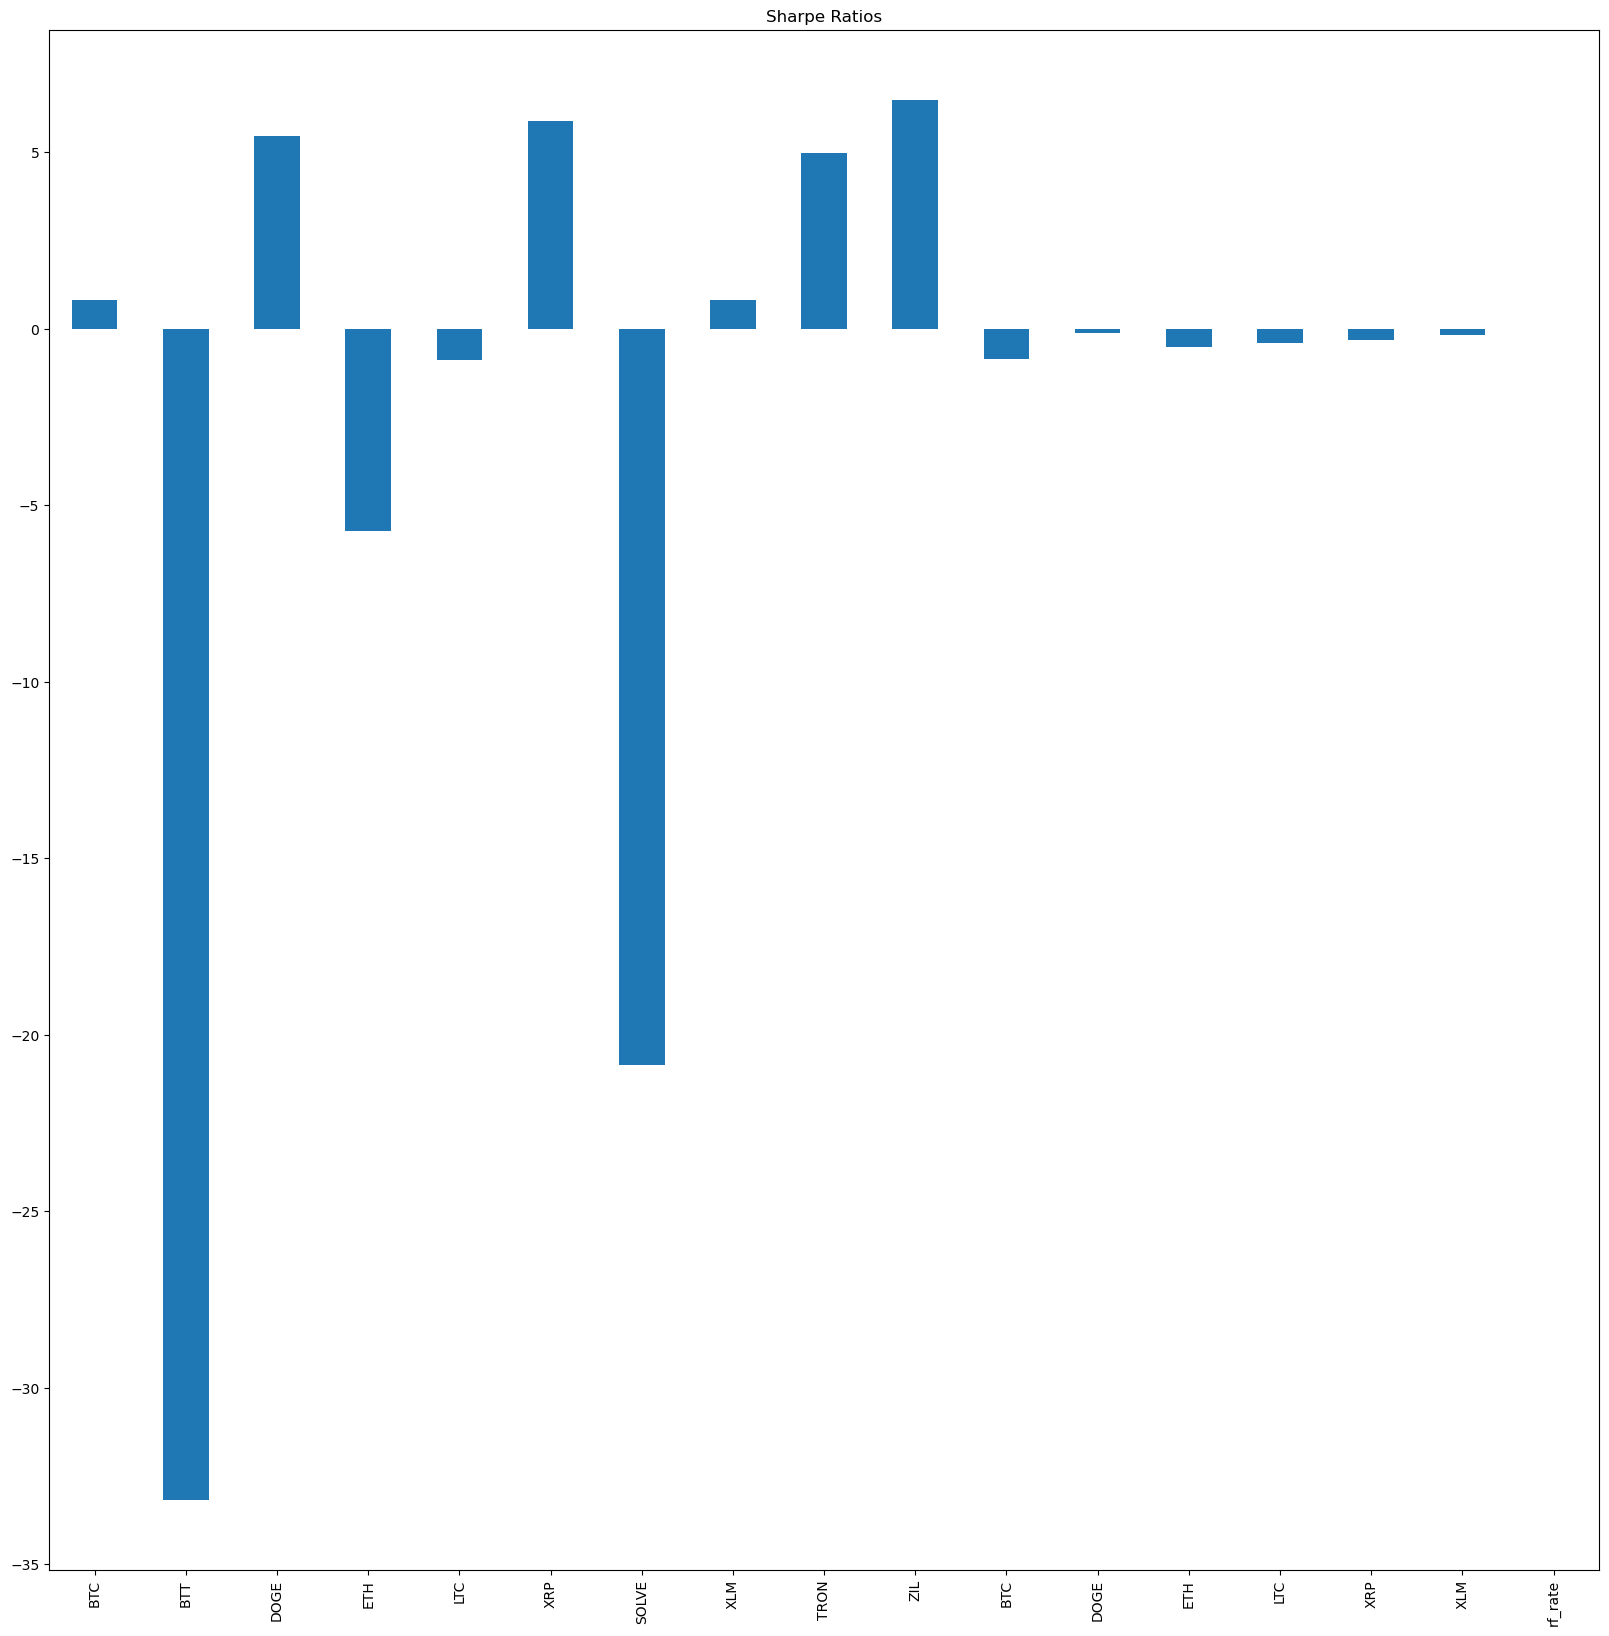

In [26]:
combined_sharpe_ratios.plot(kind="bar",title="Sharpe Ratios",figsize=(20,20))

### How many smart investments did Harold make compared to risky investments? How many did you make?

In [ ]:
### Harold made 6 smart investments compared to 4 risky ones
### I made 0 smart investments compared to 6 risky ones

### Which cryptos have been the smartest investment?

In [ ]:
### ZIL, XRP, DOGE, and TRON have been the smartest investments